<h1><center>An analysis of the Effect of Cap and Trade Policy on overall emissions level of California Using Synthetic Control Approach.</center></h1>
<h3><center>Jui Sen, Ahad Khan</center></h3>


#### California's 'Cap and Trade program' was launched in 2013 to reduce greenhouse gas emissions. In this project, We intend to analyze the effect of the cap and trade policy on California's overall greenhouse gas (GHG) emissions level. In this analysis, We utilize GHG emissions data from different states of the USA, including California. I omit the data of those states under other 'Cap and Trade' programs. I employ the Synthetic Control approach to estimate the effectiveness of the program.

### Why Synthetic Control Aproach

#### The analysis contains one treated unit ( California state) and twenty control units ( 43 other states). The synthetic control approach allows the combined control units to replicate the pre-treatment behavior of the treatment unit and employ that 'synthetic unit' as control.

### Data Processing

#### We construct a balanced panel dataset of  GHG emissions data from 44 states for the period 2010–2017.  The following section represent the entire process of preparing balanced panel data set for this project.

In [1046]:
import os
os.chdir("D:\\")
import pandas as pd
import numpy as np


In [1047]:
# Mergeing the Emissions data from the year 2010 to 2017.

In [1048]:
df1 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2010.csv')

In [1049]:
df1.columns.to_list()

['Facility Id',
 'FRS Id',
 'Facility Name',
 'City',
 'State',
 'Zip Code',
 'Address',
 'County',
 'Latitude',
 'Longitude',
 'Primary NAICS Code',
 'Industry Type (subparts)',
 'Industry Type (sectors)',
 'Total reported direct emissions']

In [1050]:
df1 = df1[[ 'FRS Id', 'State','Primary NAICS Code','Total reported direct emissions']]
df1['year']= 2010

In [1051]:
df1

,FRS Id,State,Primary NAICS Code,Total reported direct emissions,year
0,1.100438e+11,TX,562212,0.00,2010
1,1.100198e+11,NY,221112,"82,959.74",2010
2,NaN,NM,213112,"25,176.66",2010
3,NaN,NM,213112,"38,883.20",2010
4,NaN,NM,213112,"63,884.36",2010
...,...,...,...,...,...
6292,1.100230e+11,TX,211111,"53,508.55",2010
6293,1.100125e+11,MI,221112,"455,591.16",2010
6294,1.100213e+11,IL,221112,"84,045.04",2010
6295,1.100008e+11,CO,221330,"44,410.74",2010


In [1052]:
df1 =  df1.dropna()
df1

,FRS Id,State,Primary NAICS Code,Total reported direct emissions,year
0,1.100438e+11,TX,562212,0.00,2010
1,1.100198e+11,NY,221112,"82,959.74",2010
5,1.100104e+11,IL,562212,"12,869.00",2010
6,1.100438e+11,NM,213112,"56,478.59",2010
7,1.100701e+11,NM,213112,"55,075.09",2010
...,...,...,...,...,...
6292,1.100230e+11,TX,211111,"53,508.55",2010
6293,1.100125e+11,MI,221112,"455,591.16",2010
6294,1.100213e+11,IL,221112,"84,045.04",2010
6295,1.100008e+11,CO,221330,"44,410.74",2010


In [1053]:
df2 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2011.csv')
df2 = df2[['FRS Id','State','Primary NAICS Code','Total reported direct emissions']]
df2['year'] = 2011
df2 =  df2.dropna()
df1 = pd.merge(df1,df2, on= ['FRS Id','State','Primary NAICS Code','Total reported direct emissions','year'], how = 'outer')

In [1054]:
df2 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2012.csv')
df2 = df2[['FRS Id','State','Primary NAICS Code','Total reported direct emissions']]
df2['year'] = 2012
df2 =  df2.dropna()
df1 = pd.merge(df1,df2, on= ['FRS Id','State','Primary NAICS Code','Total reported direct emissions','year'], how = 'outer')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,6,7,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1055]:
df2 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2013.csv')
df2 = df2[['FRS Id','State','Primary NAICS Code','Total reported direct emissions']]
df2['year'] = 2013
df2 =  df2.dropna()
df1 = pd.merge(df1,df2, on= ['FRS Id','State','Primary NAICS Code','Total reported direct emissions','year'], how = 'outer')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,6,7,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1056]:
df2 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2014.csv')
df2 = df2[['FRS Id','State','Primary NAICS Code','Total reported direct emissions']]
df2['year'] = 2014
df2 =  df2.dropna()
df1 = pd.merge(df1,df2, on= ['FRS Id','State','Primary NAICS Code','Total reported direct emissions','year'], how = 'outer')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,6,7,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1057]:
df2 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2015.csv')
df2 = df2[['FRS Id','State','Primary NAICS Code','Total reported direct emissions']]
df2['year'] = 2015
df2 =  df2.dropna()
df1 = pd.merge(df1,df2, on= ['FRS Id','State','Primary NAICS Code','Total reported direct emissions','year'], how = 'outer')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,6,7,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1058]:
df2 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2016.csv')
df2 = df2[['FRS Id','State','Primary NAICS Code','Total reported direct emissions']]
df2['year'] = 2016
df2 =  df2.dropna()
df1 = pd.merge(df1,df2, on= ['FRS Id','State','Primary NAICS Code','Total reported direct emissions','year'], how = 'outer')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,6,7,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1059]:
df2 = pd.read_csv('D:\\ghgrp_year\\ghgp_data_2017.csv')
df2 = df2[['FRS Id','State','Primary NAICS Code','Total reported direct emissions']]
df2['year'] = 2017
df2 =  df2.dropna()
df1 = pd.merge(df1,df2, on= ['FRS Id','State','Primary NAICS Code','Total reported direct emissions','year'], how = 'outer')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,6,7,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1060]:
df1

,FRS Id,State,Primary NAICS Code,Total reported direct emissions,year
0,1.100438e+11,TX,562212.0,0.00,2010
1,1.100198e+11,NY,221112.0,"82,959.74",2010
2,1.100104e+11,IL,562212.0,"12,869.00",2010
3,1.100438e+11,NM,213112.0,"56,478.59",2010
4,1.100701e+11,NM,213112.0,"55,075.09",2010
...,...,...,...,...,...
54923,1.100555e+11,TX,486210.0,"11,961.96",2017
54924,1.100213e+11,IL,221112.0,"271,470.88",2017
54925,1.100008e+11,CO,221330.0,"14,363.20",2017
54926,1.100694e+11,TX,331111.0,"749,328.25",2017


In [1061]:
df1.columns =['FRS Id',
 'State',
 'primary_NAIC',
 'Total reported direct emissions',
 'year']

In [1062]:
df1['primary_NAIC'] = df1['primary_NAIC'].astype('str')
df1['primary_NAIC'] = df1['primary_NAIC'].str[:1]

In [1063]:
df1 = df1[df1['primary_NAIC']=='3'] # Consider the facilities belong to manufacturing industry

df1.primary_NAIC.value_counts()


3    18392
Name: primary_NAIC, dtype: int64

In [1064]:
df1.State.unique()

array(['TX', 'AL', 'IL', 'MN', 'AR', 'MO', 'OH', 'MI', 'PR', 'SD', 'IA',
       'WI', 'ND', 'TN', 'VA', 'KY', 'KS', 'NE', 'ID', 'WA', 'SC', 'CA',
       'LA', 'PA', 'IN', 'GA', 'FL', 'NM', 'OK', 'CO', 'NY', 'NH', 'NJ',
       'AZ', 'NC', 'WV', 'OR', 'MT', 'UT', 'VT', 'AK', 'MD', 'WY', 'MA',
       'MS', 'DE', 'ME', 'CT', 'NV', 'HI', 'VI', 'RI'], dtype=object)

In [1065]:
# Remove those states which are under different Cap N Trade Programs.
df1 = df1[df1['State']!='CT'] 
df1 = df1[df1['State']!='DE']
df1 = df1[df1['State']!='ME']
df1 = df1[df1['State']!='MD']
df1 = df1[df1['State']!='MA']
df1 = df1[df1['State']!='NH']
df1 = df1[df1['State']!='NJ']
df1 = df1[df1['State']!='NY']


In [1066]:
df1.State.unique()

array(['TX', 'AL', 'IL', 'MN', 'AR', 'MO', 'OH', 'MI', 'PR', 'SD', 'IA',
       'WI', 'ND', 'TN', 'VA', 'KY', 'KS', 'NE', 'ID', 'WA', 'SC', 'CA',
       'LA', 'PA', 'IN', 'GA', 'FL', 'NM', 'OK', 'CO', 'AZ', 'NC', 'WV',
       'OR', 'MT', 'UT', 'VT', 'AK', 'WY', 'MS', 'NV', 'HI', 'VI', 'RI'],
      dtype=object)

In [1067]:
df1.columns.to_list()
df1.columns = ['frs_id',
 'State',
 'Primary NAICS Code',
 'Total reported direct emissions',
 'year']

In [1068]:
xx = df1[df1['year']==2010]
xx = xx.drop_duplicates(keep='last')
xx

,frs_id,State,Primary NAICS Code,Total reported direct emissions,year
5,1.100006e+11,TX,3,"36,879.41",2010
7,1.100006e+11,AL,3,"28,750.00",2010
9,1.100004e+11,AL,3,"50,947.46",2010
10,1.100139e+11,IL,3,"28,987.89",2010
11,1.100004e+11,MN,3,"44,522.61",2010
...,...,...,...,...,...
6148,1.100421e+11,KY,3,"147,102.24",2010
6177,1.100003e+11,PA,3,"26,991.42",2010
6216,1.100313e+11,CO,3,"45,627.53",2010
6217,1.100005e+11,CA,3,"4,521.05",2010


In [1069]:
yy = df1[df1['year']==2017]
yy = yy.drop_duplicates(keep='last')
yy

,frs_id,State,Primary NAICS Code,Total reported direct emissions,year
48485,1.100006e+11,TX,3,"36,202.26",2017
48487,1.100006e+11,AL,3,"25,133.96",2017
48490,1.100004e+11,AL,3,"47,331.52",2017
48491,1.100139e+11,IL,3,"713,887.61",2017
48492,1.100004e+11,MN,3,"33,796.91",2017
...,...,...,...,...,...
54880,1.100003e+11,PA,3,"29,093.11",2017
54882,1.100006e+11,OH,3,"24,201.81",2017
54890,1.100005e+11,TX,3,"69,169.69",2017
54907,1.100313e+11,CO,3,"47,284.07",2017


In [1070]:
yy1 = yy[yy.frs_id.isin(xx.frs_id)]
yy1

,frs_id,State,Primary NAICS Code,Total reported direct emissions,year
48485,1.100006e+11,TX,3,"36,202.26",2017
48487,1.100006e+11,AL,3,"25,133.96",2017
48490,1.100004e+11,AL,3,"47,331.52",2017
48491,1.100139e+11,IL,3,"713,887.61",2017
48492,1.100004e+11,MN,3,"33,796.91",2017
...,...,...,...,...,...
54854,1.100006e+11,NE,3,"26,105.75",2017
54855,1.100438e+11,IL,3,"29,315.04",2017
54863,1.100017e+11,OR,3,"73,926.62",2017
54880,1.100003e+11,PA,3,"29,093.11",2017


In [1071]:
# Creting Balanced Panel dataset
xx1 = df1.groupby('frs_id').filter(lambda x: len(x) == 8) 
xx1

,frs_id,State,Primary NAICS Code,Total reported direct emissions,year
5,1.100006e+11,TX,3,"36,879.41",2010
7,1.100006e+11,AL,3,"28,750.00",2010
9,1.100004e+11,AL,3,"50,947.46",2010
10,1.100139e+11,IL,3,"28,987.89",2010
11,1.100004e+11,MN,3,"44,522.61",2010
...,...,...,...,...,...
54854,1.100006e+11,NE,3,"26,105.75",2017
54855,1.100438e+11,IL,3,"29,315.04",2017
54863,1.100017e+11,OR,3,"73,926.62",2017
54880,1.100003e+11,PA,3,"29,093.11",2017


In [1072]:
df1 = df1[df1.frs_id.isin(xx1.frs_id)]
df1

,frs_id,State,Primary NAICS Code,Total reported direct emissions,year
5,1.100006e+11,TX,3,"36,879.41",2010
7,1.100006e+11,AL,3,"28,750.00",2010
9,1.100004e+11,AL,3,"50,947.46",2010
10,1.100139e+11,IL,3,"28,987.89",2010
11,1.100004e+11,MN,3,"44,522.61",2010
...,...,...,...,...,...
54854,1.100006e+11,NE,3,"26,105.75",2017
54855,1.100438e+11,IL,3,"29,315.04",2017
54863,1.100017e+11,OR,3,"73,926.62",2017
54880,1.100003e+11,PA,3,"29,093.11",2017


In [1073]:
df1['Total reported direct emissions'] = df1['Total reported direct emissions'].str.replace(',','')
df1['Total reported direct emissions'] = df1['Total reported direct emissions'].apply(pd.to_numeric, errors='coerce')

df1['total'] = df1.groupby(['year','State'])['Total reported direct emissions'].transform(lambda x: x.sum())
df1

,frs_id,State,Primary NAICS Code,Total reported direct emissions,year,total
5,1.100006e+11,TX,3,36879.41,2010,1.142099e+08
7,1.100006e+11,AL,3,28750.00,2010,1.576083e+07
9,1.100004e+11,AL,3,50947.46,2010,1.576083e+07
10,1.100139e+11,IL,3,28987.89,2010,2.486209e+07
11,1.100004e+11,MN,3,44522.61,2010,9.401203e+06
...,...,...,...,...,...,...
54854,1.100006e+11,NE,3,26105.75,2017,5.505345e+06
54855,1.100438e+11,IL,3,29315.04,2017,2.213592e+07
54863,1.100017e+11,OR,3,73926.62,2017,2.449864e+06
54880,1.100003e+11,PA,3,29093.11,2017,2.090111e+07


In [1074]:
df1 = df1[['State',
 'year',
 'total']].drop_duplicates(keep='last')

In [1075]:
df1

,State,year,total
2783,HI,2010,529748.02
3235,PR,2010,530284.75
3362,VI,2010,5250184.37
4567,NM,2010,1470489.09
5203,ID,2010,1788881.63
...,...,...,...
54854,NE,2017,5505345.48
54855,IL,2017,22135922.57
54863,OR,2017,2449863.61
54880,PA,2017,20901110.85


In [1076]:
df1['log_em'] = np.arcsinh(df1['total'])
df1

,State,year,total,log_em
2783,HI,2010,529748.02,13.873304
3235,PR,2010,530284.75,13.874317
3362,VI,2010,5250184.37,16.166921
4567,NM,2010,1470489.09,14.894253
5203,ID,2010,1788881.63,15.090248
...,...,...,...,...
54854,NE,2017,5505345.48,16.214377
54855,IL,2017,22135922.57,17.605859
54863,OR,2017,2449863.61,15.404690
54880,PA,2017,20901110.85,17.548460


In [1077]:
conditions = [
    (df1['year']< 2013),
    (df1['year']>= 2013)
    ]
values = [0, 1]
df1['post'] = np.select(conditions, values)

#df1['post'] = df1['post'].astype(np.int64)
#df1['post'] = df1['post'].fillna(0)
df1.post.unique()

array([0, 1])

In [1078]:
df1.State.unique()

array(['HI', 'PR', 'VI', 'NM', 'ID', 'RI', 'NV', 'AR', 'MO', 'ND', 'GA',
       'AK', 'AZ', 'UT', 'MS', 'SD', 'IA', 'NC', 'OR', 'KS', 'NE', 'MT',
       'MI', 'TN', 'LA', 'CA', 'IL', 'WV', 'TX', 'OK', 'WI', 'IN', 'OH',
       'SC', 'FL', 'AL', 'VT', 'MN', 'WA', 'VA', 'WY', 'KY', 'PA', 'CO'],
      dtype=object)

In [1079]:
conditions = [
    (df1['State']== 'CA'),
    (df1['State']!= 'CA')
    ]
values = [1, 0]
df1['treat'] = np.select(conditions, values)

df1.treat.unique()

array([0, 1])

#### This the final balanced panel data-set

In [1080]:
df1

,State,year,total,log_em,post,treat
2783,HI,2010,529748.02,13.873304,0,0
3235,PR,2010,530284.75,13.874317,0,0
3362,VI,2010,5250184.37,16.166921,0,0
4567,NM,2010,1470489.09,14.894253,0,0
5203,ID,2010,1788881.63,15.090248,0,0
...,...,...,...,...,...,...
54854,NE,2017,5505345.48,16.214377,1,0
54855,IL,2017,22135922.57,17.605859,1,0
54863,OR,2017,2449863.61,15.404690,1,0
54880,PA,2017,20901110.85,17.548460,1,0


In [1081]:

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model


In [1082]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1083]:

treatment_year = 2013
treated_state = 'CA'

#### For the synthetic control analysis we need to reshape the data from long to wide format.

In [1084]:
df1 = df1.pivot(index='year', columns='State', values='log_em').reset_index()

In [1085]:
df1

State,year,AK,AL,AR,AZ,CA,CO,FL,GA,HI,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,2010,14.284738,17.266185,16.196204,15.344676,18.086874,15.681279,17.028300,16.791255,13.873304,...,16.908655,19.246696,15.805704,16.509132,16.166921,11.774004,16.821031,16.537256,15.959551,15.564882
1,2011,14.466691,17.413163,16.325829,15.305521,18.076811,15.701149,17.378020,16.849404,13.929124,...,16.934190,19.265418,16.011129,16.667452,16.001761,11.762420,16.926156,16.575317,16.074884,15.562798
2,2012,14.421887,17.390461,16.275639,15.291271,18.101727,15.793833,17.091438,16.755777,13.943366,...,16.941288,19.271613,16.037646,16.668460,14.101884,11.695499,16.909277,16.530130,16.035240,15.655005
3,2013,14.432748,17.435481,16.153399,15.272940,18.107660,15.841981,17.045405,16.752600,13.737810,...,16.963467,19.293040,16.051096,16.632765,12.264700,11.729066,16.921408,16.514253,15.983085,15.671074
4,2014,14.362736,17.490498,16.250730,15.433776,18.169231,15.916642,17.099013,16.778410,13.885204,...,16.938761,19.302706,16.021695,16.586506,12.217467,11.745288,16.925865,16.556516,16.017955,15.630968
5,2015,14.263067,17.431986,16.211245,15.411010,18.174116,15.861668,17.049882,16.700328,13.856934,...,16.910598,19.302137,16.003184,16.496765,12.077493,11.646023,16.879073,16.484648,15.985907,15.660350
6,2016,14.239657,17.427136,16.176758,15.314386,18.173749,15.825214,17.302301,16.681412,13.825237,...,16.924517,19.291486,15.993891,16.497602,12.188123,11.646233,16.888891,16.385961,15.912764,15.576377
7,2017,14.406585,17.393632,16.301970,15.391394,18.177959,15.879689,17.324905,16.595255,13.767418,...,16.889691,19.274756,16.053663,16.474971,12.203805,11.644905,16.833824,16.382247,15.737822,15.670396


In [1086]:

states = [c for c in df1.columns if c!='year']
df1['Other_states'] = df1[[c for c in states if c != treated_state]].mean(axis=1)

In [1087]:

    
def plot_lines(df1, line1, line2, year, hline=True):
    sns.lineplot(x=df1['year'], y=df1[line1].values, label=line1)
    sns.lineplot(x=df1['year'], y=df1[line2].values, label=line2)
    plt.axvline(x=year, ls=":", color='C2', label='Cap N Trade')
    plt.legend();
    plt.title("Gap in emissions");

In [1088]:
sns.set_palette(sns.color_palette(['#f14db3', '#0dc3e2', '#443a84']))

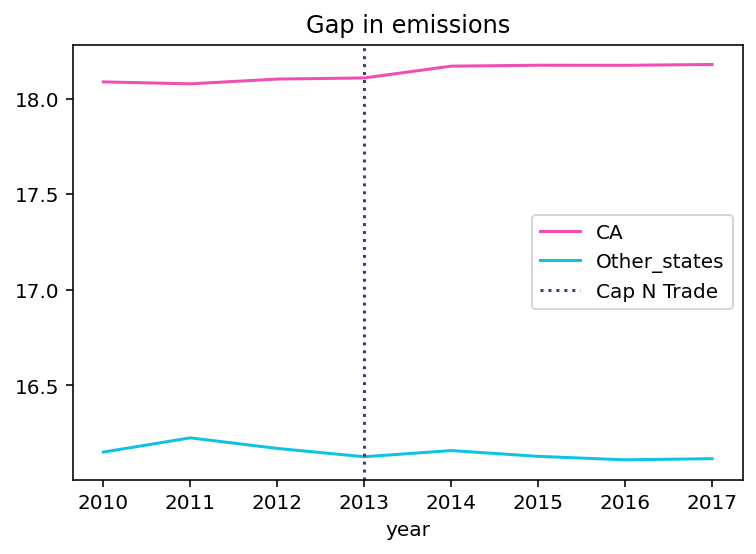

In [1089]:
plot_lines(df1, treated_state, 'Other_states', treatment_year)

####  As we can see, a slight increase in emissionsa after the treatment in California.  And the emisisons pattern is pretty similar in pre and post treatment period for the remaining states.

In [1090]:
def synth_predict(df1, model, State, year):
    other_state = [c for c in states if c not in ['year', State]]
    y = df1.loc[df1['year'] <= year, State]
    X = df1.loc[df1['year'] <= year, other_state]
    df1[f'Synthetic {State}'] = model.fit(X, y).predict(df1[other_state])
    return model

In [1091]:
from sklearn.linear_model import LinearRegression

coef = synth_predict(df1, LinearRegression(), treated_state, treatment_year).coef_

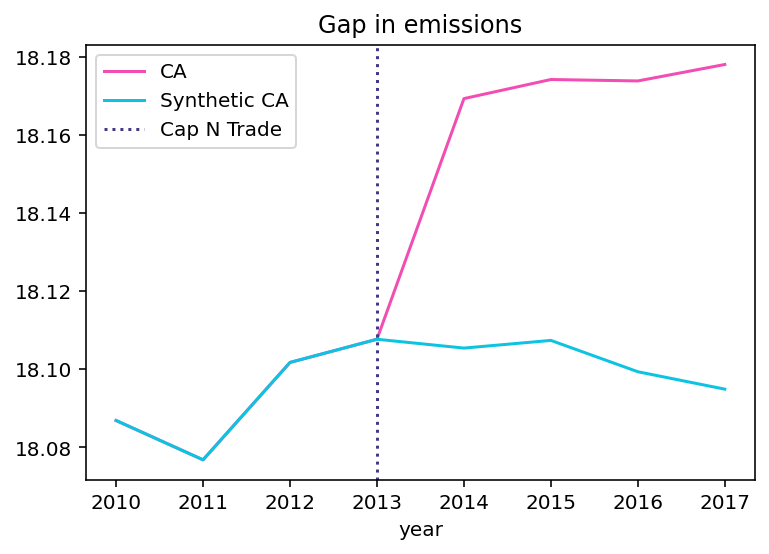

In [1092]:
plot_lines(df1, treated_state, f'Synthetic {treated_state}', treatment_year)

#### The above figure illustrates that the cap and trade policy has a role in increasing the level of greenhouse gas emissions in California. The synthetic trend is lower than the actual trend after the cap and trade policy was enacted.

#### An identical emissions pattern for both 'actual California' and 'synthetic California' emissions reveals the overfitting of the model. We also need to remove those control units with negative weights to overcome this problem.



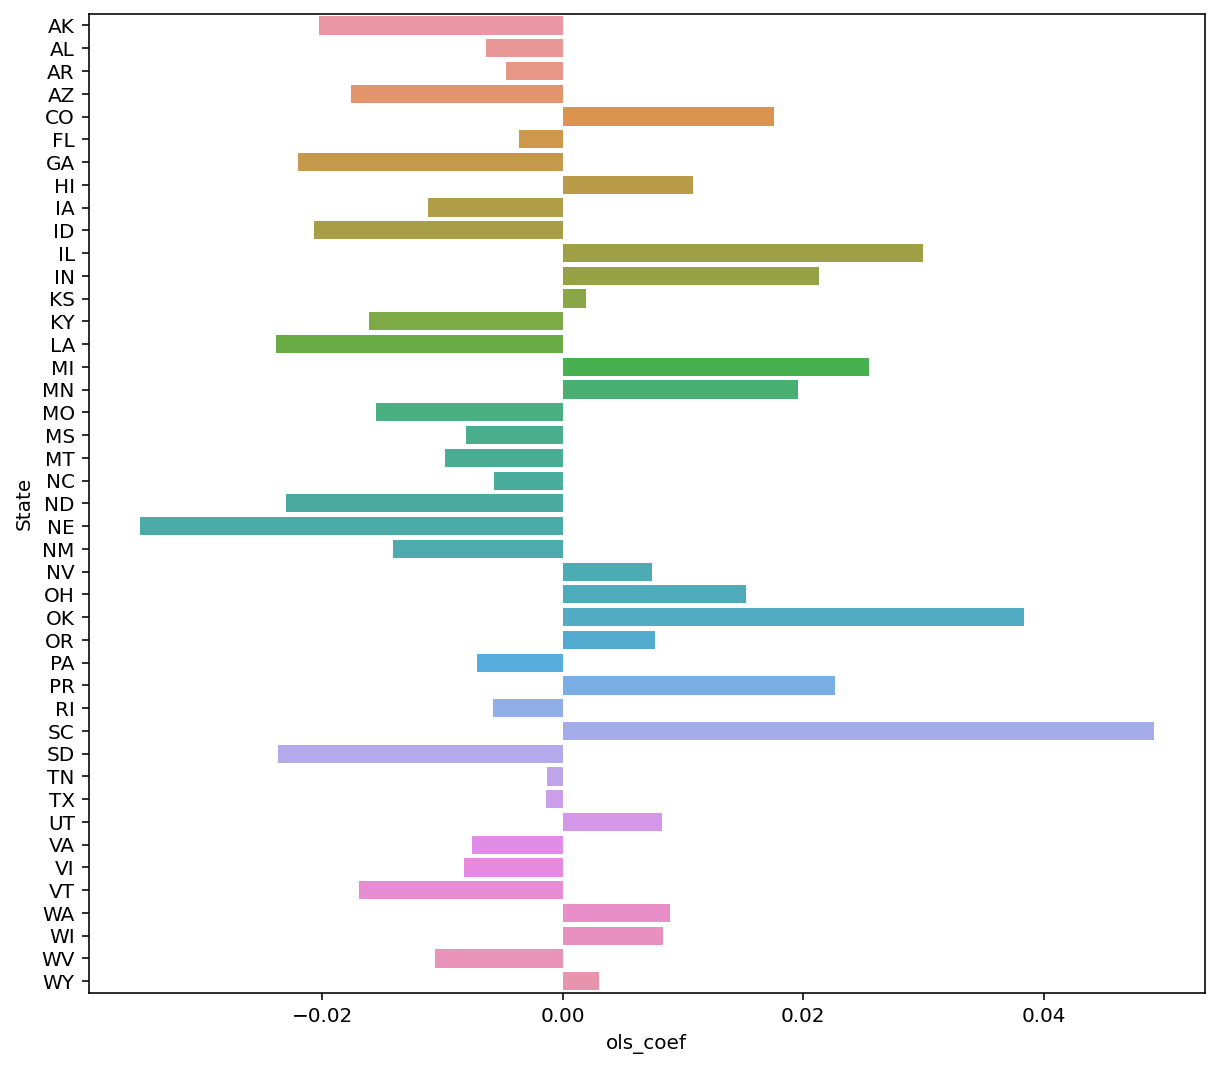

In [1104]:
df1_states = pd.DataFrame({'State': [c for c in states if c!=treated_state], 'ols_coef': coef})
plt.figure(figsize=(10, 9))
sns.barplot(data=df1_states, x='ols_coef', y='State');

####  We fix the problem of overfitting and negative weight control units by adding loss function and fitted model to the synthetic control model.

In [1105]:
from toolz import partial
from scipy.optimize import fmin_slsqp

class SyntheticControl():
    
    # Loss function
    def loss(self, W, X, y) -> float:
        return np.sqrt(np.mean((y - X.dot(W))**2))

    # Fit model
    def fit(self, X, y):
        w_start = [1/X.shape[1]]*X.shape[1]
        self.coef_ = fmin_slsqp(partial(self.loss, X=X, y=y),
                         np.array(w_start),
                         f_eqcons=lambda x: np.sum(x) - 1,
                         bounds=[(0, 1)]*len(w_start),
                         disp=False)
        self.mse = self.loss(W=self.coef_, X=X, y=y)
        return self
    
    # Predict 
    def predict(self, X):
        return X.dot(self.coef_)

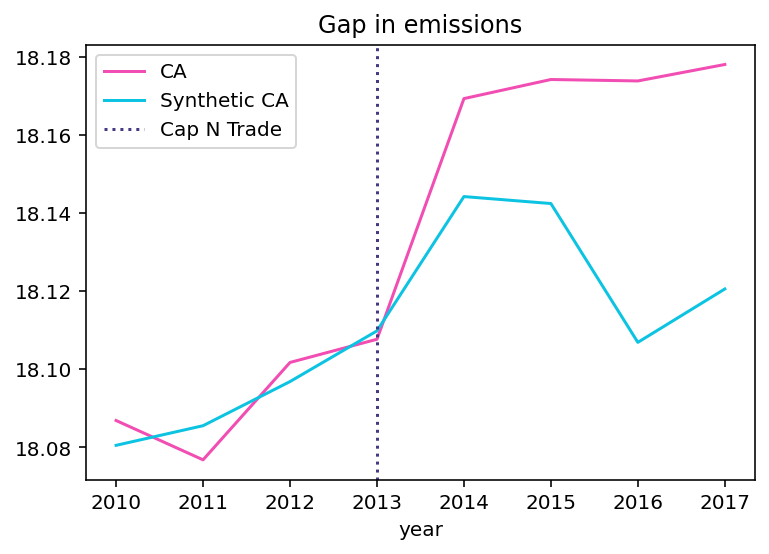

In [1106]:

df1_states['coef_synth'] = synth_predict(df1, SyntheticControl(), treated_state, treatment_year).coef_

plot_lines(df1, treated_state, f'Synthetic {treated_state}', treatment_year)





#### The figure illustrates that the log of emissions of California goes up due to the effect of the Cap and trade policy.

In [1096]:
def plot_difference(df1, State, year, vline=True, hline=True, **kwargs):
    sns.lineplot(x=df1['year'], y=df1[State] - df1[f'Synthetic {State}'], **kwargs)
    if vline: 
        plt.axvline(x=year, ls=":", color='C2', lw=3, label='Cap_n_trade', zorder=100)
        plt.legend()
    if hline: sns.lineplot(x=df1['year'], y=0, lw=3, color='k', zorder=1)
    plt.title("Estimated effect of Cap N Trade Policy");

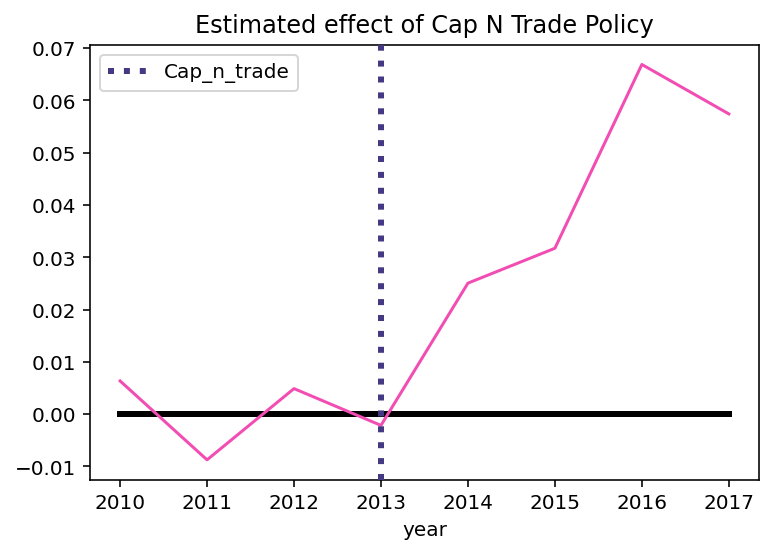

In [1097]:
plot_difference(df1, treated_state, treatment_year)

#### The above figure plots the difference between actual and synthetic California emissions, and we can see that the difference increase over time after the treatment year.

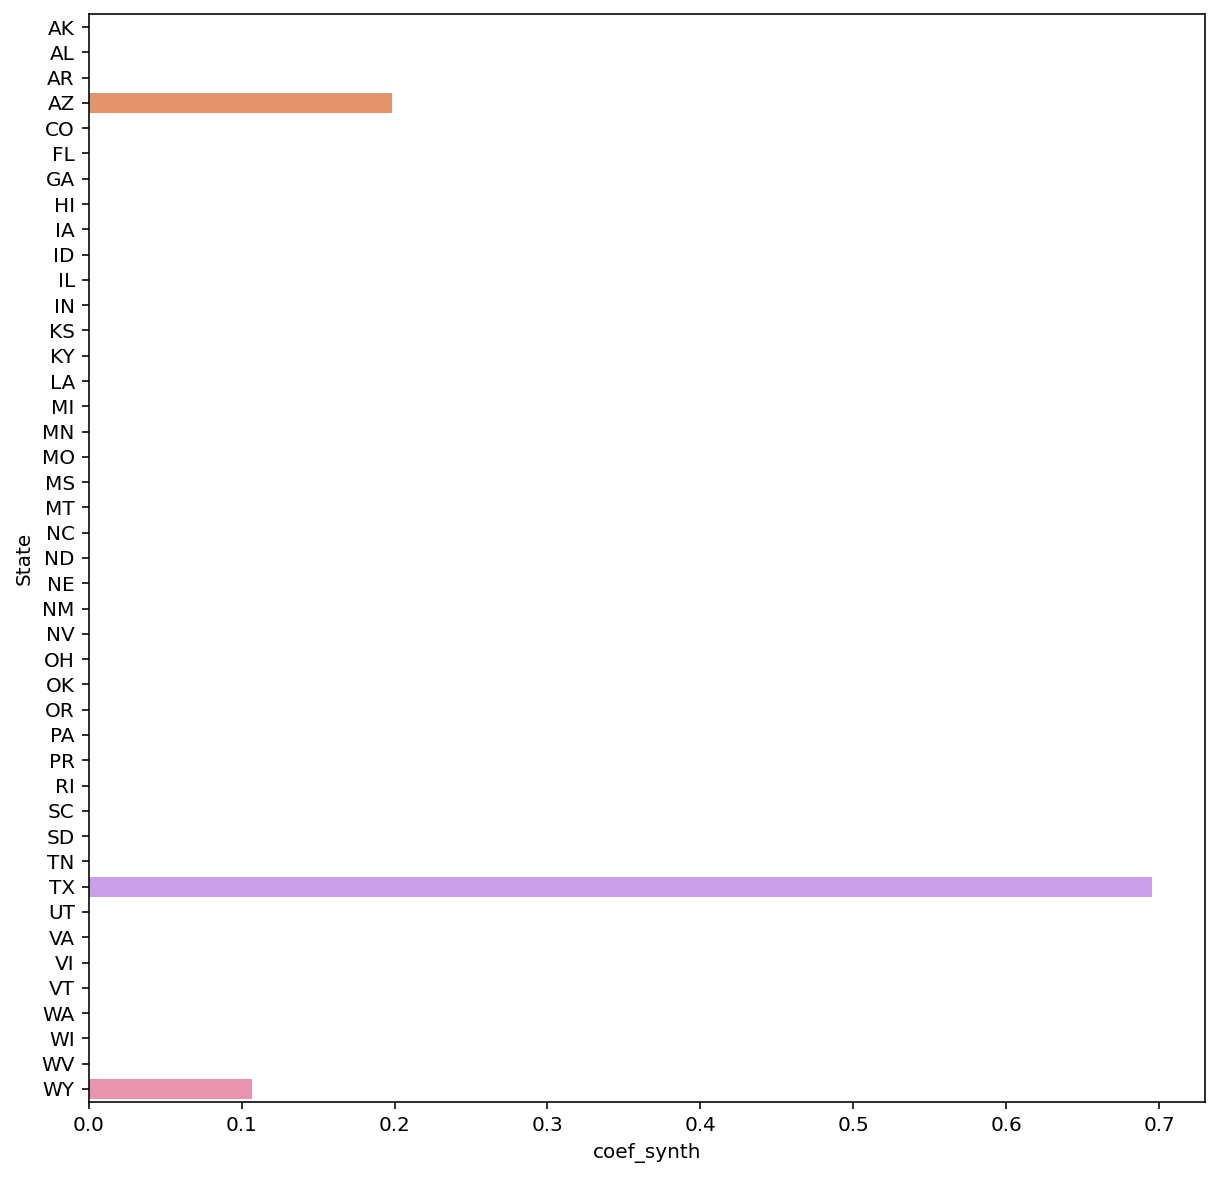

In [1114]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df1_states, x='coef_synth', y='State');

#### The above figure shows the 'synthetic California's emissions now consist of the emissions of Arizona, Texas, and Wyoming.

#### Now to analyze the significance of the result, we will look at the effect on other states. If the effect in California is not identically different from the effect in other states, then the policy has no influence on the emissions pattern of California.

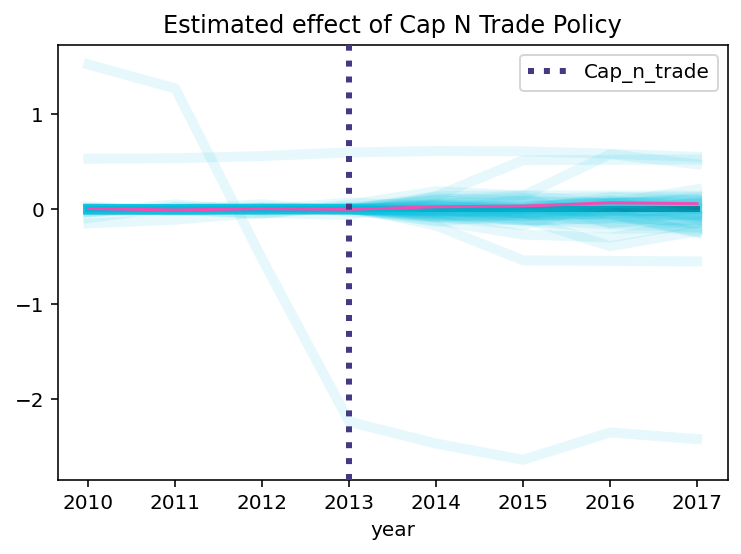

In [1109]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots()
for State in states:
    synth_predict(df1, SyntheticControl(), State, treatment_year)
    plot_difference(df1, State, treatment_year, vline=False, alpha=0.1, color='C1', lw=5)
plot_difference(df1, treated_state, treatment_year)


In the above figure, we can see that there are a few states for which the pre-trend is not well fitted. In line with Abadie, Diamond, and Hainmueller (2010), we remove the units for which the predicted MSE is larger than twice the MSE of the treated unit.

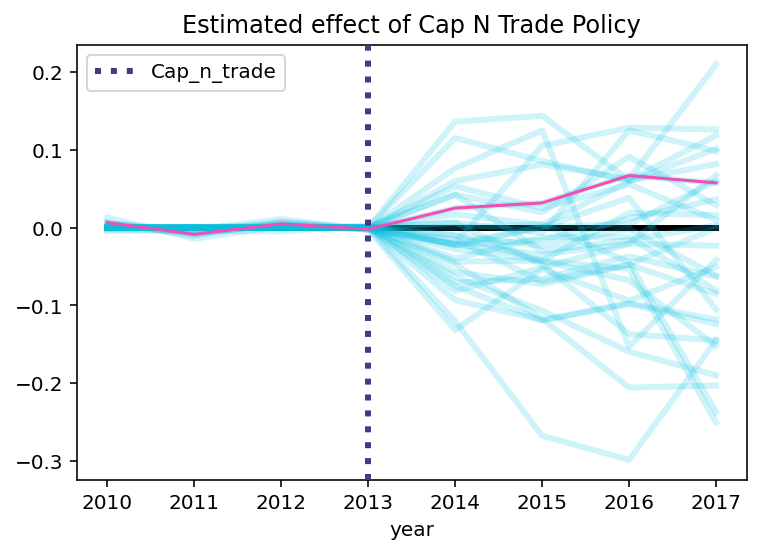

In [1110]:
mse_treated = synth_predict(df1, SyntheticControl(), treated_state, treatment_year).mse

fig, ax = plt.subplots()
for State in states:
    mse = synth_predict(df1, SyntheticControl(), State, treatment_year).mse
    if mse < 2 * mse_treated:
        plot_difference(df1, State, treatment_year, vline=False, alpha=0.2, color='C1', lw=3)
plot_difference(df1, treated_state, treatment_year)


#### The figure illustrates the effect is pretty similar for California as it is in some other states. Finally, we can look at the p-value from the histogram based on ratio between pre-treatment and post-treatment MSE

In [1111]:
lambdas = {}
for State in states:
    mse_pre = synth_predict(df1, SyntheticControl(), State, treatment_year).mse
    mse_tot = np.mean((df1[f'Synthetic {State}'] - df1[State])**2)
    lambdas[State] = (mse_tot - mse_pre) / mse_pre
    
print(f"p-value: {np.mean(np.fromiter(lambdas.values(), dtype='float') > lambdas[treated_state]):.4}")

p-value: 0.8864


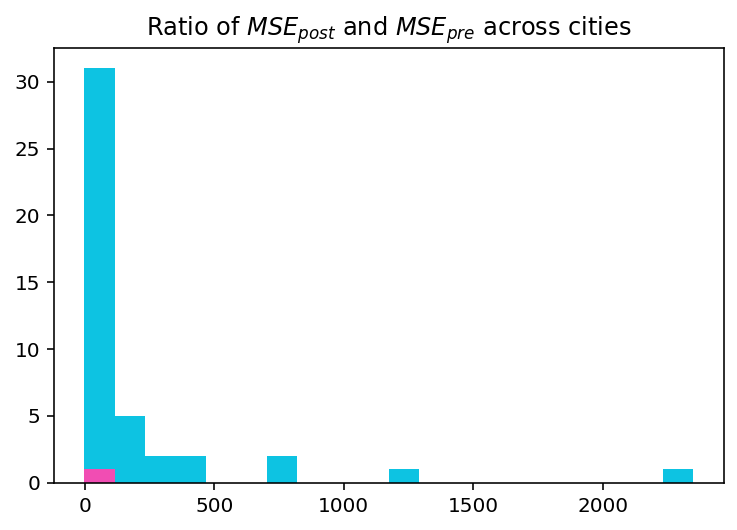

In [1112]:
fig, ax = plt.subplots()
_, bins, _ = plt.hist(lambdas.values(), bins=20, color="C1");
plt.hist([lambdas[treated_state]], bins=bins)
plt.title('Ratio of $MSE_{post}$ and $MSE_{pre}$ across cities');


#### The p-value indicates that 88.64 percent of the states have a larger MSE ratio than California. Hence, we can say that the cap-n-trade policy does not contribute to the change in the GHG emissions pattern in California.